In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
df = pd.read_csv('./spam.csv', encoding='latin-1')

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\Bhavyam\AppData\Local\Temp\ipykernel_14420\950909719.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="v1",data=df, palette="pastel")


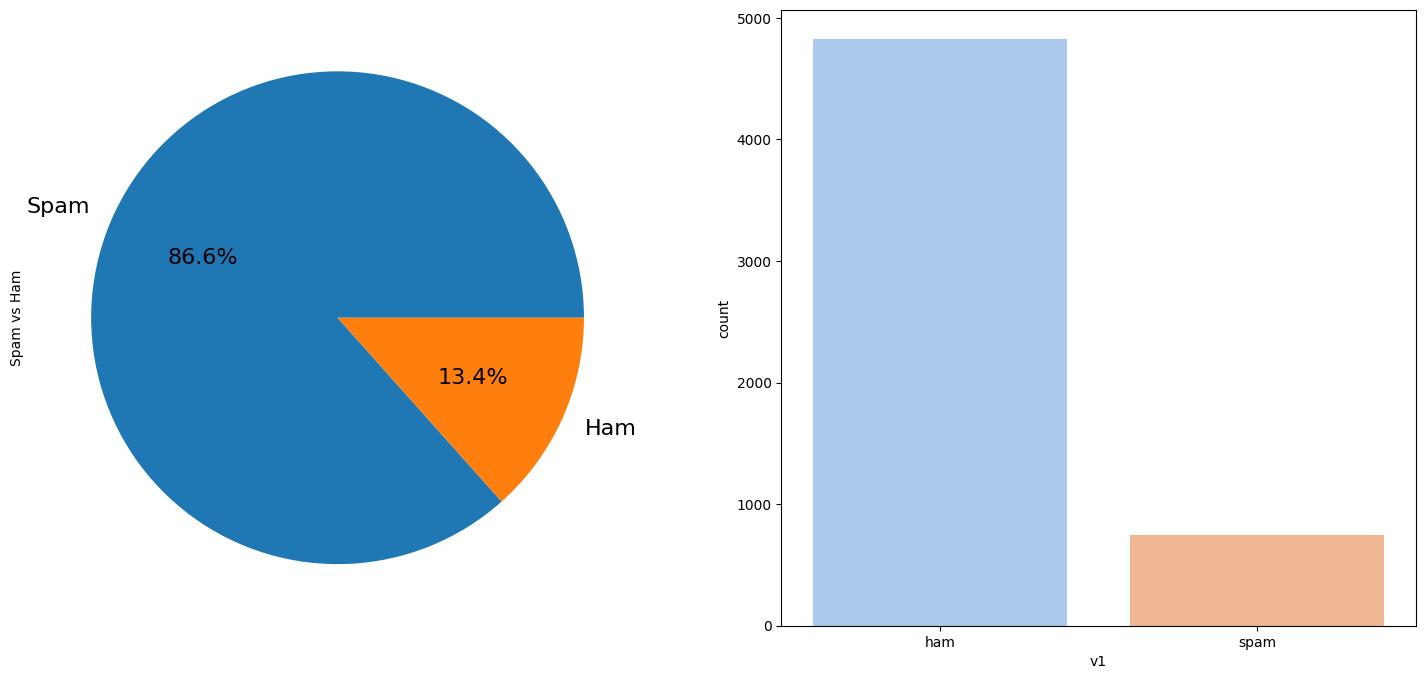

In [15]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.v1.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Spam", "Ham"],
                                           ylabel="Spam vs Ham",
                                           autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="v1",data=df, palette="pastel")
plt.show()

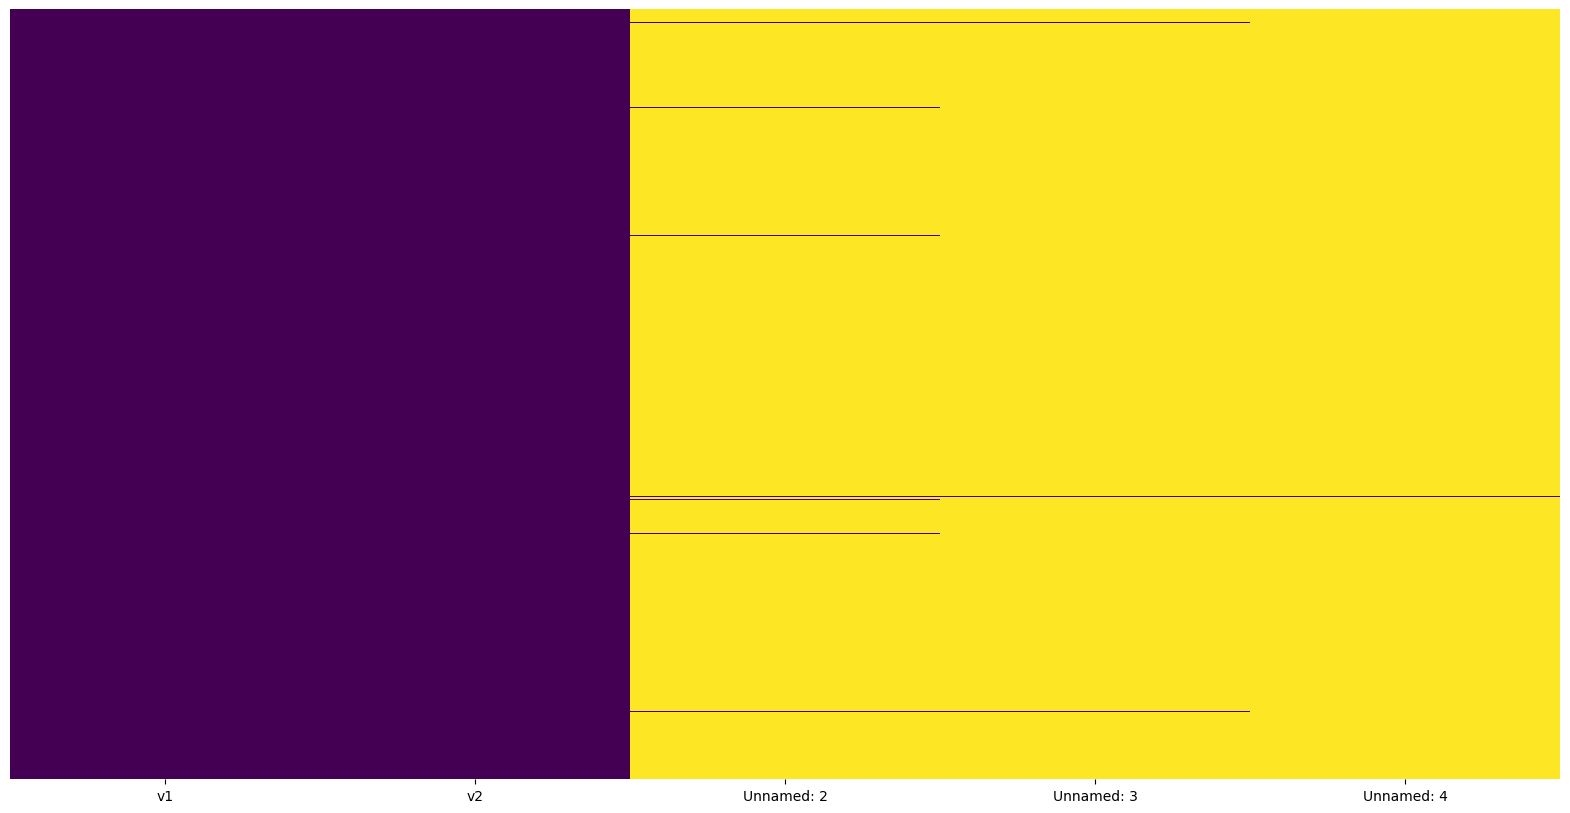

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(yticklabels=False, data=df.isnull(), cbar=False, cmap="viridis")
plt.show()

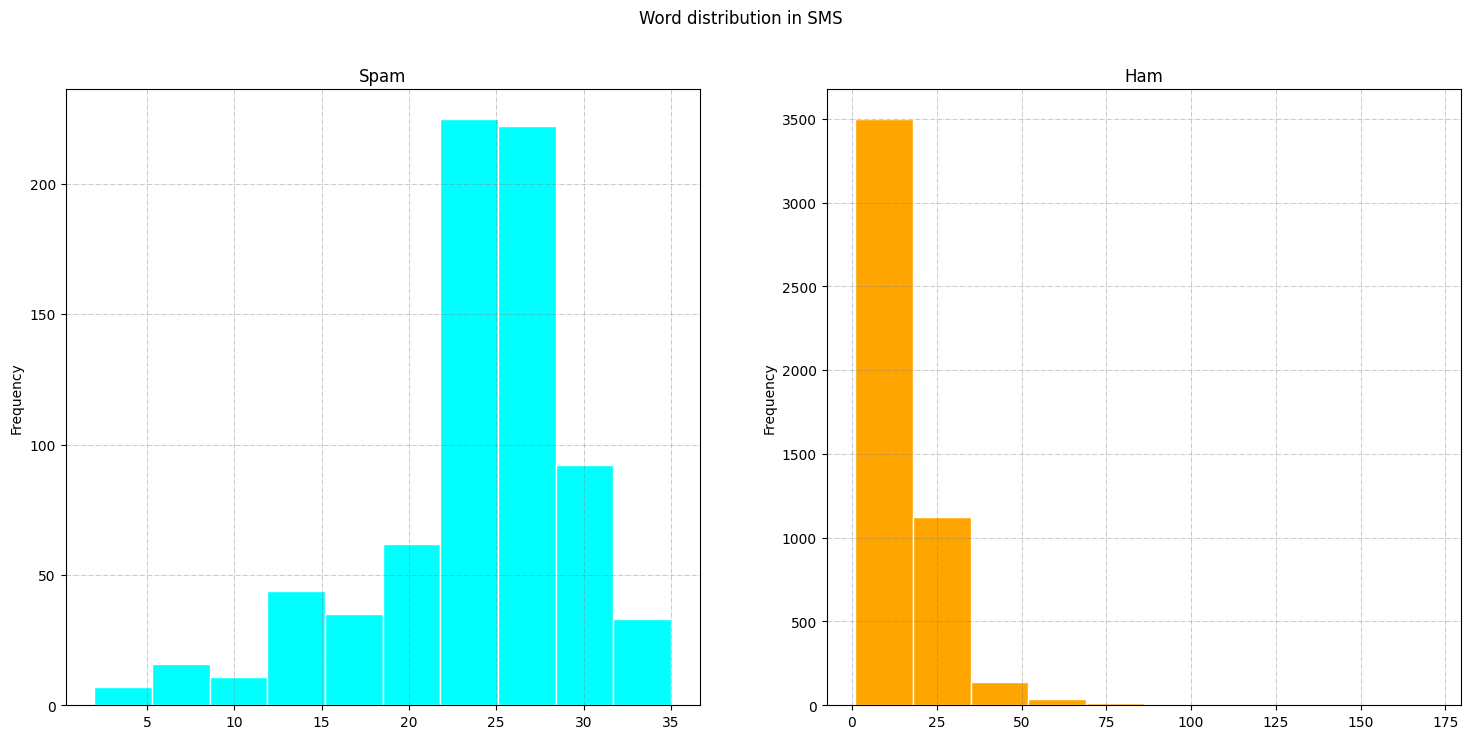

In [14]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
ax1 = df.query("v1=='spam'").v2.map(lambda x: len(x.split())).plot(kind="hist",
                                                                    color="cyan",
                                                                    title="Spam",
                                                                    edgecolor='white');
plt.subplot(1, 2, 2)
ax2 = df.query("v1=='ham'").v2.map(lambda x: len(x.split())).plot(kind="hist",
                                                                    color="orange",
                                                                    title="Ham",
                                                                    edgecolor='white');

ax1.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
ax2.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.6)
plt.suptitle('Word distribution in SMS')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




Word Cloud for Spam messages




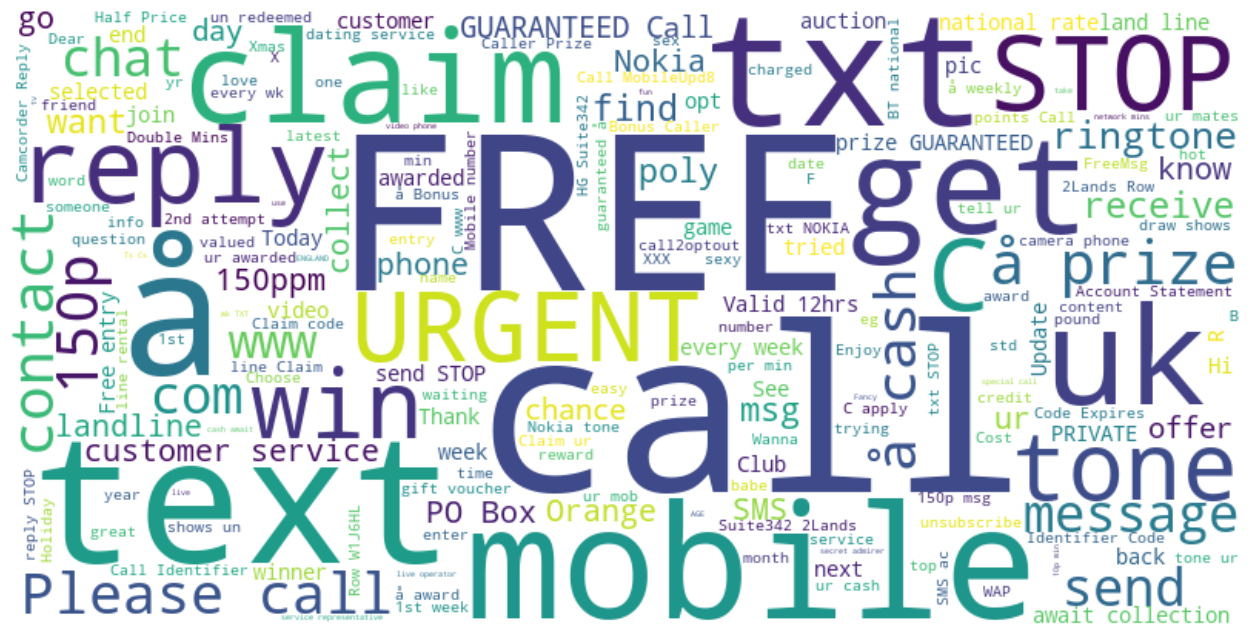



Word Cloud for Ham messages




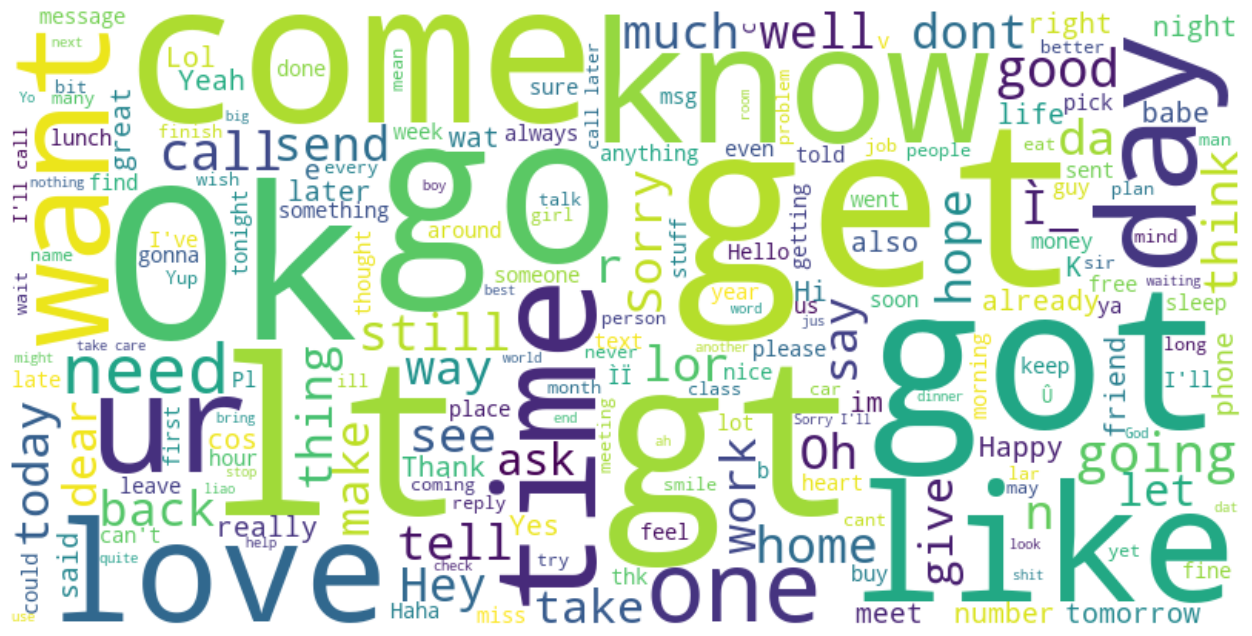

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words= set(stopwords.words("english"))

stop_words.update(['https', 'http', 'amp', 'CO', 't', 'u', 'new', "I'm", "would"])

wc = WordCloud(width=800,
               height=400,
               max_words=200,
               stopwords=stop_words,
               background_color='white',
               max_font_size=150)
spam = df.query("v1=='spam'").v2.str.cat(sep=" ")

ham = df.query("v1=='ham'").v2.str.cat(sep=" ")

print('\n\nWord Cloud for Spam messages\n\n')
wc.generate(spam)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('\n\nWord Cloud for Ham messages\n\n')
wc.generate(ham)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df = df.replace('spam', 1)
df = df.replace('ham', 0)
df

C:\Users\Bhavyam\AppData\Local\Temp\ipykernel_14420\3946088189.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('ham', 0)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = text.replace('.', '')
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    return text.lower()

df.v2 = [cleanText(item) for item in df.v2]
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry in a wkly comp to win fa cup final...,NaN,NaN,NaN
3,0,u dun say so early hor u c already then say,NaN,NaN,NaN
4,0,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN
...,...,...,...,...,...
5567,1,this is the nd time we have tried contact u u...,NaN,NaN,NaN
5568,0,will ì_ b going to esplanade fr home,NaN,NaN,NaN
5569,0,pity was in mood for that soany other suggest...,NaN,NaN,NaN
5570,0,the guy did some bitching but i acted like id ...,NaN,NaN,NaN


In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.oov_token = '<oovToken>'
tokenizer.fit_on_texts(df.v2)
vocab = tokenizer.word_index
vocabCount = len(vocab)+1

vocabCount

8606

In [20]:
SPLIT = 5000

xTrain = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(df.v2.to_numpy()), padding='pre', maxlen=171)
yTrain = df.v1.to_numpy()
dim = xTrain.shape[1]
xTest = xTrain[SPLIT:]
yTest = yTrain[SPLIT:]

xTrain = xTrain[:SPLIT]
yTrain = yTrain[:SPLIT]

xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((5000, 171), (5000,), (572, 171), (572,))

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocabCount+1, output_dim=64, input_length=dim))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\Bhavyam\Desktop\Credit\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(xTrain, yTrain, epochs=10, shuffle=True)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8346 - loss: 0.4441
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8720 - loss: 0.3694
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3766
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8982 - loss: 0.2422
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9702 - loss: 0.1045
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9745 - loss: 0.0747
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9828 - loss: 0.0607
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9816 - loss: 0.0585
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9848 - loss: 0.0541
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9805 - loss: 0.0596


In [24]:
model.evaluate(xTest, yTest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9786 - loss: 0.0673


[0.08633270859718323, 0.9772727489471436]